В данном проекте проведён анализ почасового потребления электроэнергии в зоне покрытия компании [American Electric Power (AEP)](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption?resource=download 'Kaggle, датасет') за период с 2004 по 2018 год.

##### **Импорт библиотек**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 5)

##### **Загрузка данных. Первый взгляд**

In [2]:
df = pd.read_csv("../data/AEP_hourly.csv", parse_dates=["Datetime"])
df.set_index("Datetime", inplace=True)

In [3]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [5]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


AEP_MW    0
dtype: int64

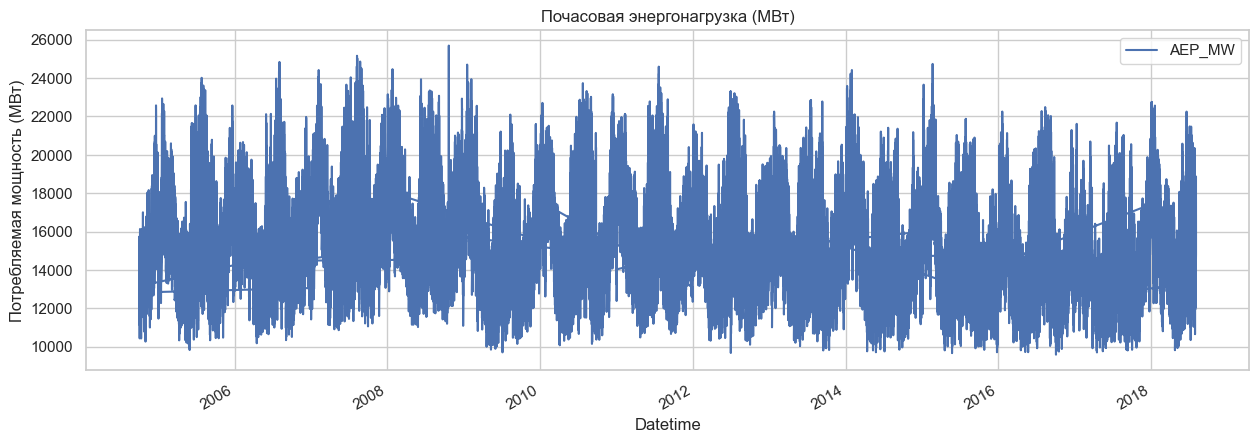

In [6]:
# Визуализация всей временной серии
df.plot(title="Почасовая энергонагрузка (МВт)", ylabel="Потребляемая мощность (МВт)")
plt.show()

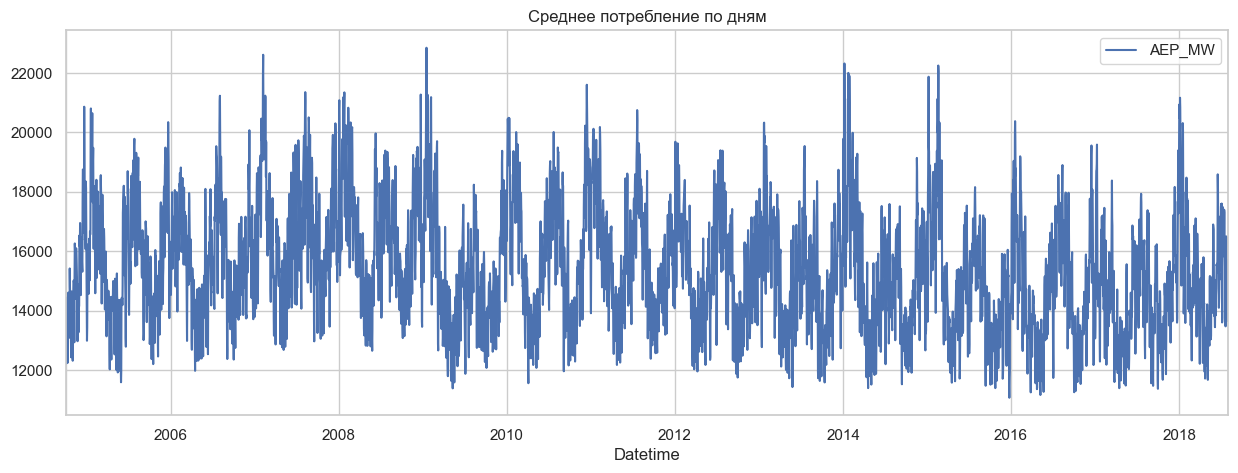

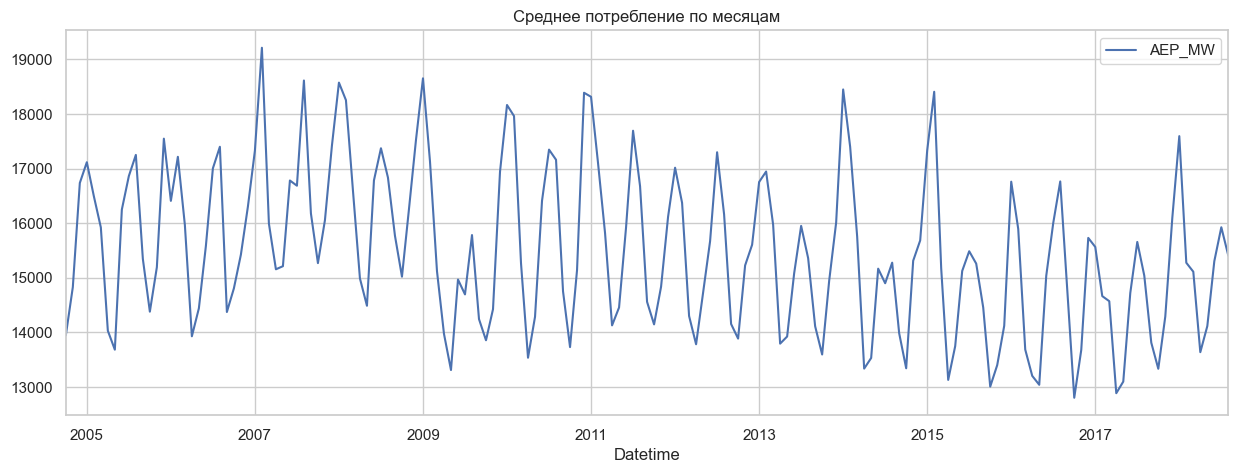

In [11]:
df_daily = df.resample("D").mean()
df_daily.plot(title="Среднее потребление по дням")
plt.show()

df_monthly = df.resample("ME").mean()
df_monthly.plot(title="Среднее потребление по месяцам")
plt.show()

 **Наблюдения**

*Ежедневное потребление ЭЭ*
- На графике видно много колебаний, но исходя из их периодичности уже можно сделать предположение о некоторой сезонности
- Значения изменяются в диапазоне от ~12000 МВт до ~22000 МВт
- Наблюдается высокая вариативность, при этом данные цикличны

*Усреднение по месяцам)*
- Явно наблюдается годовая сезонность. Пики и спады довльно регулярны
- Всплески нагрузки приемущественно происходят зимой (отопление) и летом (кондиционирование)
- После 2015 года потребление снизилось*
  
*Предположения:
  1. Изменение структуры электросети, которая привела к снижению потерь в ЛЭП
  2. Возможное большее распространения перехода на ВИЭ
  3. Популярность трендов на экономию ЭЭ и энергосбережение
  4. Данные потерялись?


##### **Зависимость нагрузки от времени суток**

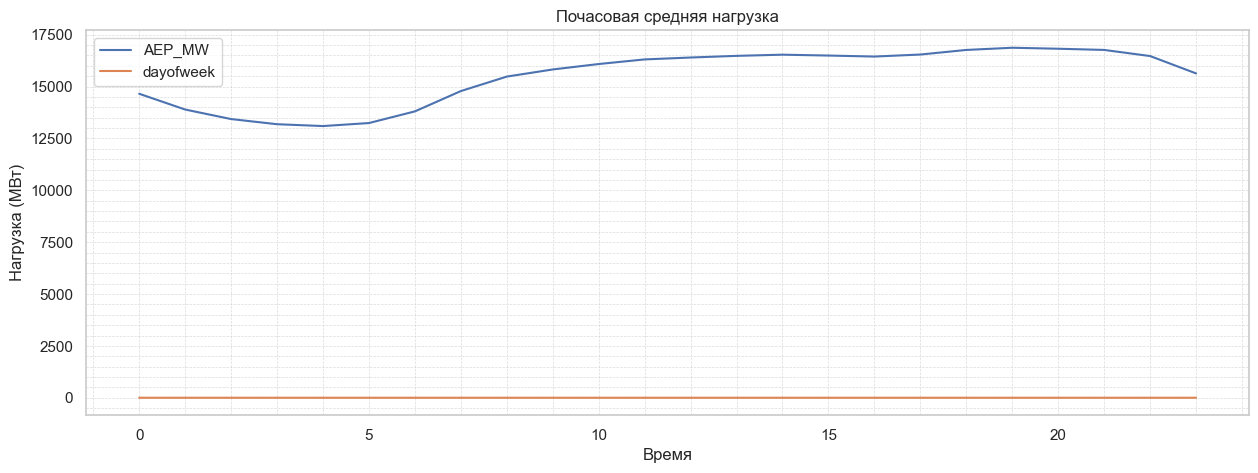

In [29]:
df["hour"] = df.index.hour

hourly_profile = df.groupby("hour").mean()  # Среднее значение по каждому часу суток

hourly_profile.plot()
plt.title("Почасовая средняя нагрузка")
plt.xlabel("Время")
plt.ylabel("Нагрузка (МВт)")
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()
plt.show()

**Наблюдения**

*Ночное потребление (0:00 - 5:00)*
- Активность минимальна (производства и заводы стоят, бытовые потребители спят)
- Минимум по времени около 4:00 утра (~13000 МВт)

*Утренний рост (6:00 - 9:00)*
- Наблюдается характерный резкий подъём (начало рабочего дня)

*Дневное плато (10:00 - 16:00)*
- Относительно стабильное, высокое потребление (часы активной промышленной и офисной нагрузки)

*Вечерний пик (18:00 - 20:00)*
- Люди возвращаются домой (готовка, работа бытовой техники), включается городское освещение


##### **Изменение потребления по дням недели**

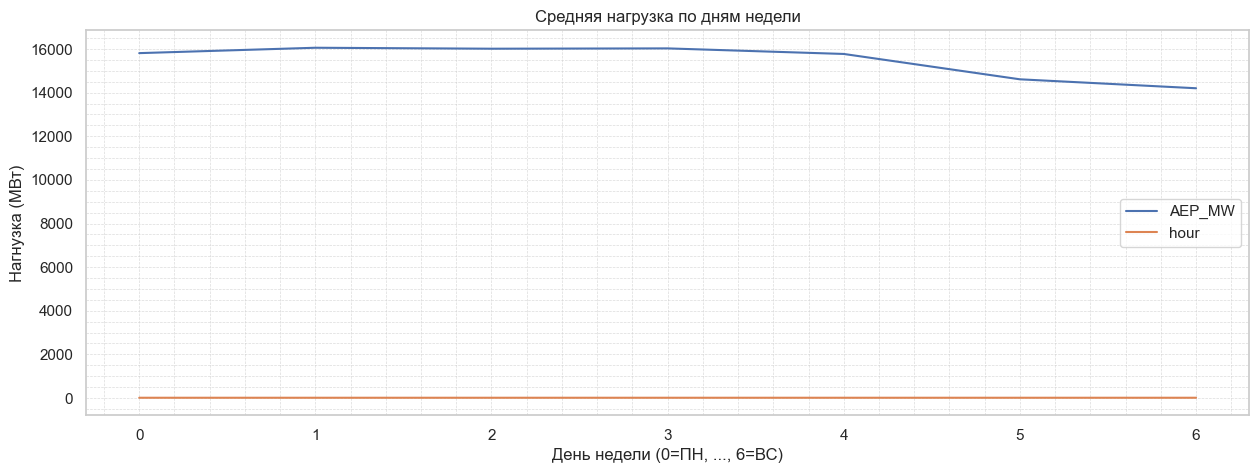

In [30]:
df["dayofweek"] = df.index.dayofweek

weekday_profile = df.groupby("dayofweek").mean()  # средняя нагрузка по дням недели

weekday_profile.plot(kind="line")
plt.title("Средняя нагрузка по дням недели")
plt.xlabel("День недели (0=ПН, ..., 6=ВС)")
plt.ylabel("Нагнузка (МВт)")
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()
plt.show()

На представленном графике отображено среднее значение почасовой электрической нагрузки (в мегаваттах) для каждого дня недели, усреднённое по всему периоду наблюдений.

Видно, что в будние дни (с понедельника по пятницу, дни 0–4) нагрузка остаётся стабильно высокой и составляет в среднем  ~16000 МВт. Наиболее высокие значения фиксируются во вторник и среду.

Начиная с пятницы, наблюдается снижение средней нагрузки, которое достигает минимума в выходные дни. В субботу уровень потребления снижается примерно до ~15000 МВт, а в воскресенье — до ~14500 МВт, что является наименьшим значением среди всех дней недели.

- Электропотребление демонстрирует выраженную зависимость от дня недели.

- Наибольшая средняя нагрузка приходится на рабочие дни, что связано с активной деятельностью промышленных, коммерческих и административных потребителей.

- В выходные дни наблюдается снижение нагрузки, что может быть объяснено уменьшением деловой активности и присутствием только базового бытового спроса.

##### **Проверка на наличие сезонных пиков**

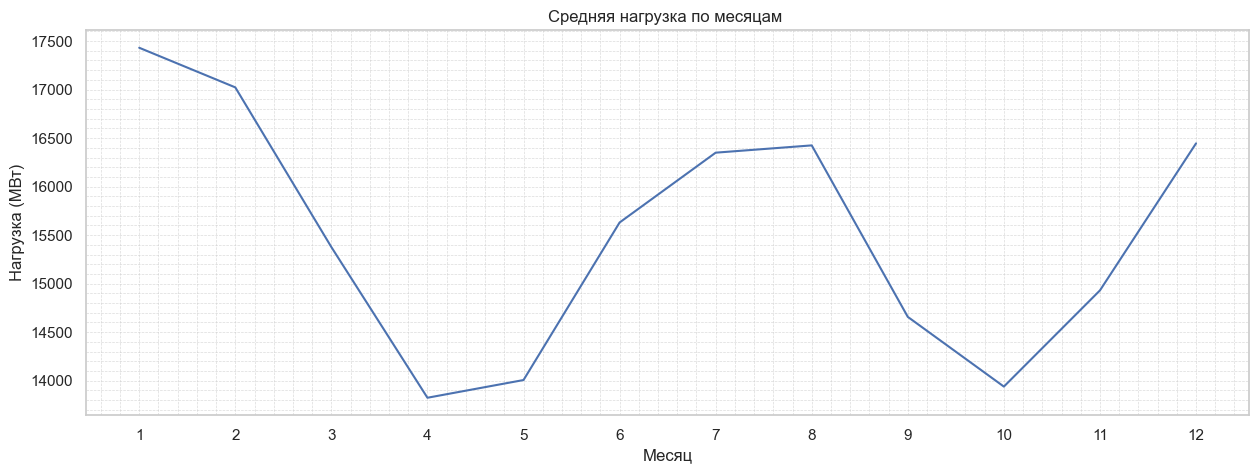

In [33]:
df["month"] = df.index.month

monthly_profile = df.groupby("month").mean()

monthly_profile["AEP_MW"].plot()
plt.title("Средняя нагрузка по месяцам ")
plt.xlabel("Месяц")
plt.ylabel("Нагрузка (МВт)")
plt.xticks(range(1, 13))  # 12 месяцев
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()
plt.show()


Максимальные значения нагрузки наблюдаются в зимние месяцы (январе и декабре) - примерно 17000 - 17500 МВт, а также в июле и августе (примерно 16500 - 16800 МВт). Эти пики могут быть связаны соответственно с интенсивным использованием отопительных систем зимой и кондиционеров летом.

Минимальные значения нагрузки приходятся на весенние и осенние месяцы, в частности на апрель и октябрь. В эти периоды нагрузка снижается до уровней околло 13800 - 14000 МВт, что может свидетельствовать о снижении потребности как в отоплении, так и в охлаждении.

- Электрическая нагрузка демонстрирует чётко выраженную сезонность.

- Пиковые значения характерны для зимы и лета, что указывает на влияние климатических факторов и соответствующих систем жизнеобеспечения.

- Минимальная нагрузка фиксируется в переходные периоды (весна и осень), когда внешние температурные условия не требуют дополнительного потребления энергии.

##### **Построение тепловой карты нагрузки**

*По часам и дням недели*

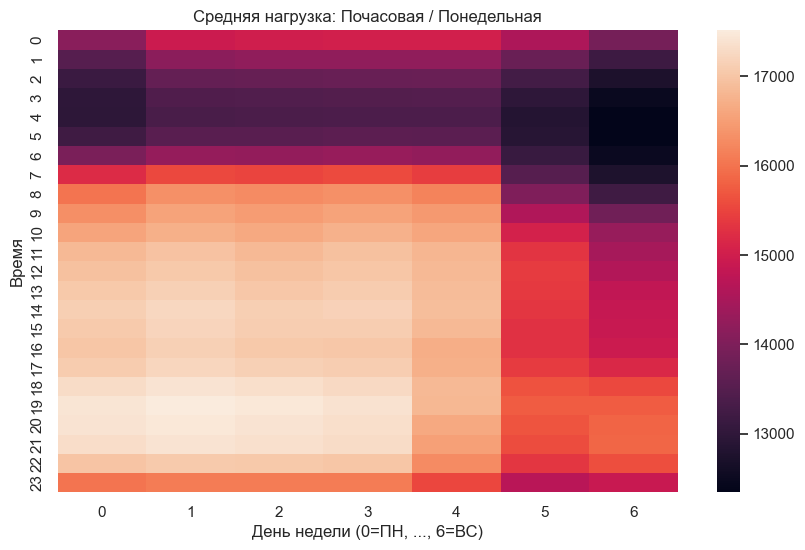

In [36]:
heatmap_data = df.pivot_table(index="hour", columns="dayofweek", values="AEP_MW", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=False)
plt.title("Средняя нагрузка: Почасовая / Понедельная")
plt.xlabel("День недели (0=ПН, ..., 6=ВС)")
plt.ylabel("Время")
plt.show()


На тепловой карте представлено распределение средней часовой электрической нагрузки (в мегаваттах) в зависимости от дня недели (по оси X) и часа суток (по оси Y). Цветовая шкала отображает интенсивность потребления: от более светлых оттенков (низкое потребление) до тёмных (высокое потребление).

Наибольшая нагрузка наблюдается в вечерние часы (с 17:00 до 21:00) в рабочие дни, особенно с понедельника по четверг. В эти периоды значения нагрузки достигают максимума (свыше 17000 МВт), что соответствует окончанию рабочего дня и активному использованию бытовой техники в жилом секторе.

Минимальные значения нагрузки фиксируются в ночные и ранние утренние часы (с 0:00 до 6:00), особенно в выходные дни — субботу и воскресенье. Нагрузка в эти периоды может опускаться ниже 13000 МВт.

Также прослеживается характерный недельный цикл: нагрузка снижается к концу недели, достигая минимума в воскресенье, после чего вновь возрастает с началом рабочей недели.

- Электрическая нагрузка демонстрирует чётко выраженные суточные и недельные паттерны.

- Максимум нагрузки приходится на вечерние часы будних дней, что указывает на комбинированное влияние производственной и бытовой активности.

- Минимум нагрузки наблюдается ночью и в выходные дни, что отражает снижение деловой активности и уменьшение потребления в жилом секторе.

- Выявленные зависимости могут быть полезны при построении прогнозных моделей и планировании работы энергосистемы с учётом времени суток и дня недели.

*По часам и месяцам*

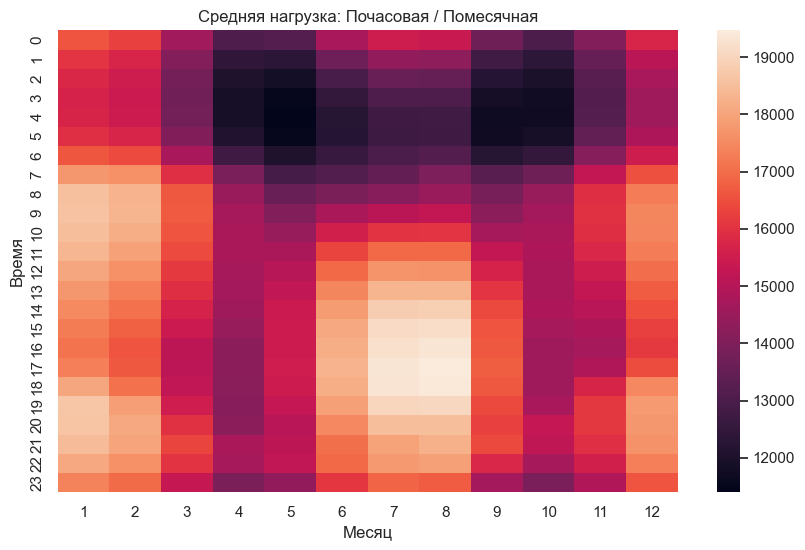

In [37]:
heatmap_data_month = df.pivot_table(index="hour", columns="month", values="AEP_MW", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_month, annot=False)
plt.title("Средняя нагрузка: Почасовая / Помесячная")
plt.xlabel("Месяц")
plt.ylabel("Время")
plt.show()


На графике представлено распределение средней часовой электрической нагрузки (в мегаваттах) в разрезе месяцев года (по оси X) и часов суток (по оси Y). Цветовая шкала отражает величину нагрузки, где тёмные оттенки соответствуют более высоким значениям.

Наибольшая нагрузка наблюдается в вечерние часы летних месяцев — в частности, в июле. В это время значения нагрузки достигают максимума, превышающего 19000 МВт. Это может быть связано с массовым использованием систем кондиционирования в пиковые часы жары.

Зимой (декабрь, январь, февраль) также фиксируются высокие значения нагрузки в утренние и вечерние часы, что, вероятно, обусловлено включением отопительных и бытовых приборов. Однако по сравнению с летними пиками нагрузка распределена более равномерно в течение суток.

Минимальные значения нагрузки приходятся на весенние и осенние месяцы (апрель, октябрь), особенно в ночные и утренние часы. В эти периоды наблюдается наименьшая активность в использовании климатических систем, что приводит к снижению потребления.

- Электрическая нагрузка демонстрирует устойчивую сезонную зависимость, с пиковыми значениями летом и зимой.

- Максимум нагрузки достигается в вечерние часы июля, что указывает на значительное влияние температурных факторов.

- Минимум нагрузки наблюдается в переходные месяцы (весна и осень), особенно в ночные часы, что отражает снижение использования систем жизнеобеспечения.

- Представленная визуализация подчёркивает необходимость сезонного планирования в управлении энергосистемой и разработке моделей прогноза нагрузки.

#### **Итоговый вывод по анализу электроэнергетической нагрузки**

В ходе анализа были изучены особенности электрической нагрузки за период наблюдений, с фокусом на суточную, недельную и сезонную динамику:

*Сезонность и тренды*

- Электропотребление демонстрирует ярко выраженную годовую сезонность: пики приходятся на зиму (отопление) и лето (кондиционирование).

- После 2015 года заметно общее снижение потребления, что может быть связано с повышением энергоэффективности, распространением ВИЭ, экономическими факторами или потерей части данных.

*Суточный ритм*

- Минимумы нагрузки приходятся на 4–5 утра, когда активность потребителей минимальна.

- Резкий рост начинается с 6:00 и продолжается до 9:00, соответствуя началу рабочего дня.

- В течение дня наблюдается относительное плато, пик — около 19–20 часов (вечернее потребление).

*Зависимость от дней недели*

- Рабочие дни (понедельник–пятница) характеризуются высокой средней нагрузкой (~16000 МВт).

- В выходные нагрузка заметно снижается (~14500 МВт), особенно в воскресенье.

**Общий вывод**

Анализ показал устойчивую повторяющуюся структуру спроса на электроэнергию, обусловленную человеческой активностью и сезонными факторами. Эти наблюдения могут быть полезны для задач прогноза нагрузки, планирования генерации и оптимизации работы электросетей.

Средняя нагрузка за период составляет около 16000 МВт в будние дни и снижается до 14500 МВт в выходные. Суточный минимум фиксируется около 4:00 (около 13000 МВт), максимум — в вечернее время (18:00–20:00) до 18000 МВт. Сезонные пики наблюдаются зимой (до 17500 МВт) и летом (до 16800 МВт), минимумы — весной и осенью (~13800 МВт). После 2015 года зафиксировано общее снижение потребления. Нагрузка чётко зависит от времени суток, дня недели и времени года.